<font size="+3"><strong>1. Exploring the Data</strong></font>

In [1]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# **1. Prepare Data**

## **1.1 Import**

In [2]:
# Load the data into dataframe, which is stored in a CSV file: `SCFP2019.csv`

df = pd.read_csv("SCFP2019.csv")
print("df shape:", df.shape)
df.head()

df shape: (28885, 351)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
0,1,11,6119.779308,2,75,6,12,4,2,0,...,5,3,6,3,2,10,6,6,3,3
1,1,12,4712.374912,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2
2,1,13,5145.224455,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2
3,1,14,5297.663412,2,75,6,12,4,2,0,...,5,2,6,2,1,10,4,4,2,2
4,1,15,4761.812371,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2


In [3]:

"""
   For this project, we're going to focus on households that have been business owners in the past 5 years.
   These households are identified in the `"HBUS"` column.
"""

# Calculate the proportion of respondents in `df` that are business owners, and assign the result to the variable `pct_biz_owners`

prop_biz_owners = len(df[df["HBUS"] == 1]) / len(df)
print("proportion of business owners in df:", prop_biz_owners)

proportion of business owners in df: 0.2740176562229531


In [4]:
"""
   Use a mask to subset create df to only households that are business owners ("HBUS" == 1).
   Assign this subset to the variable name `df_business`.
"""
mask = df["HBUS"] == 1
df_business = df[mask]
print("df_business shape:", df_business.shape)
df_business.head()

df_business shape: (7915, 351)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
35,8,81,35.406794,1,52,3,13,4,1,3,...,5,6,6,6,3,12,12,12,4,4
36,8,82,35.171353,1,52,3,13,4,1,3,...,5,6,6,6,3,12,12,12,4,4
37,8,83,35.078666,1,52,3,13,4,1,3,...,5,6,6,6,3,12,12,12,4,4
38,8,84,34.894297,1,52,3,13,4,1,3,...,5,6,6,6,3,12,12,12,4,4
39,8,85,35.063937,1,52,3,13,4,1,3,...,5,6,6,6,3,12,12,12,4,4


## **1.2 Explore**

### **1.2.1. Age**

In [5]:
# Create a list age_groups with the unique values in the "AGECL" column

age_groups = df_business["AGECL"].unique()
print("Age Groups:", age_groups)

Age Groups: [3 4 6 5 2 1]


Looking at the Code Book we can see that `"AGECL"` represents categorical data, even though the values in the column are numeric.

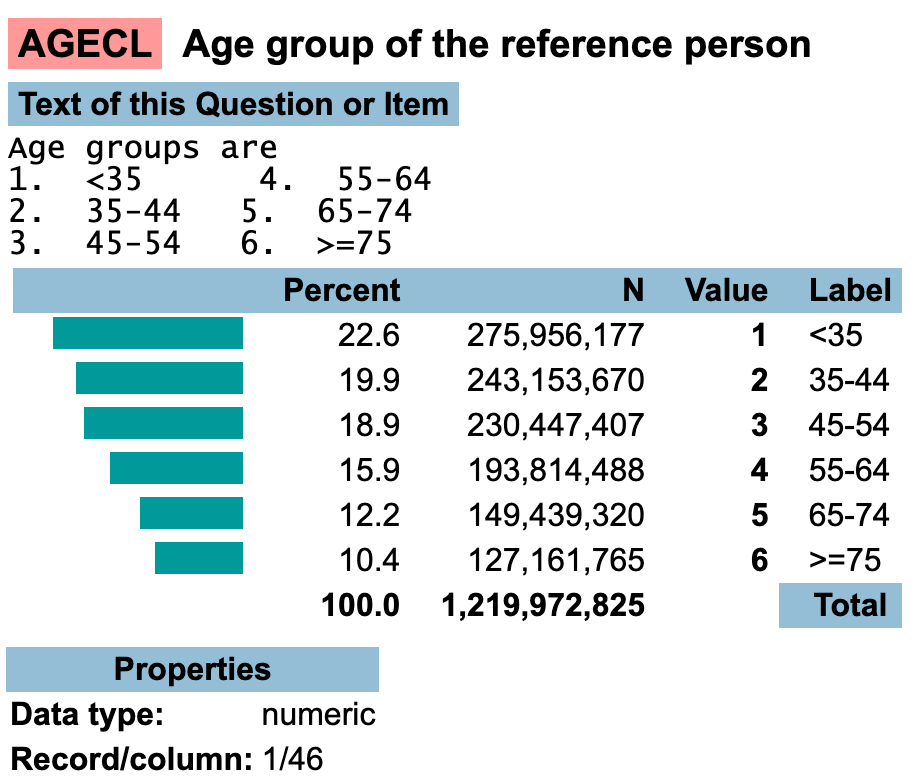

This simplifies data storage, but it's not very human-readable. So before we create a visualization, let's create a version of this column that uses the actual group names.

In [6]:
# Create a Series agecl that contains the observations from "AGECL" using the true group names

agecl_dict = {
    1: "Under 35",
    2: "35-44",
    3: "45-54",
    4: "55-64",
    5: "65-74",
    6: "75 or Older",
}

age_cl = df_business["AGECL"].replace(agecl_dict)
age_cl.head()

35    45-54
36    45-54
37    45-54
38    45-54
39    45-54
Name: AGECL, dtype: object

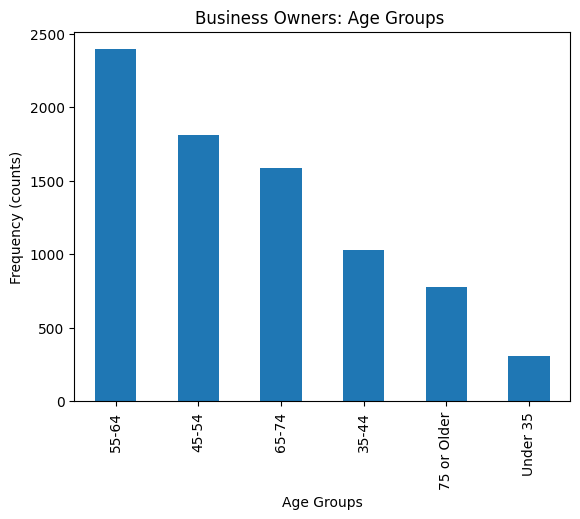

In [7]:
# Create a bar chart showing the value counts from age_cl
age_cl_value_counts = age_cl.value_counts()

# Bar plot of `age_cl_value_counts`
age_cl_value_counts.plot(
    kind='bar',
    xlabel="Age Groups",
    ylabel="Frequency (counts)",
    title="Business Owners: Age Groups "
);

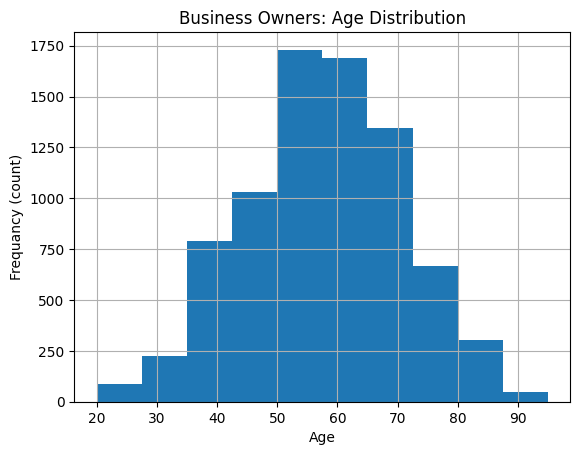

In [8]:
# Plot histogram of "AGE"
df_business["AGE"].hist(bins=10)
plt.xlabel("Age")
plt.ylabel("Frequancy (count)")
plt.title("Business Owners: Age Distribution");

### **1.2.2. Race**

Now that we have an understanding of how age relates to our outcome of interest, let's try some other possibilities, starting with race. If we look at the [Code Book](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#RACE) for `"RACE"`, we can see that there are 4 categories.

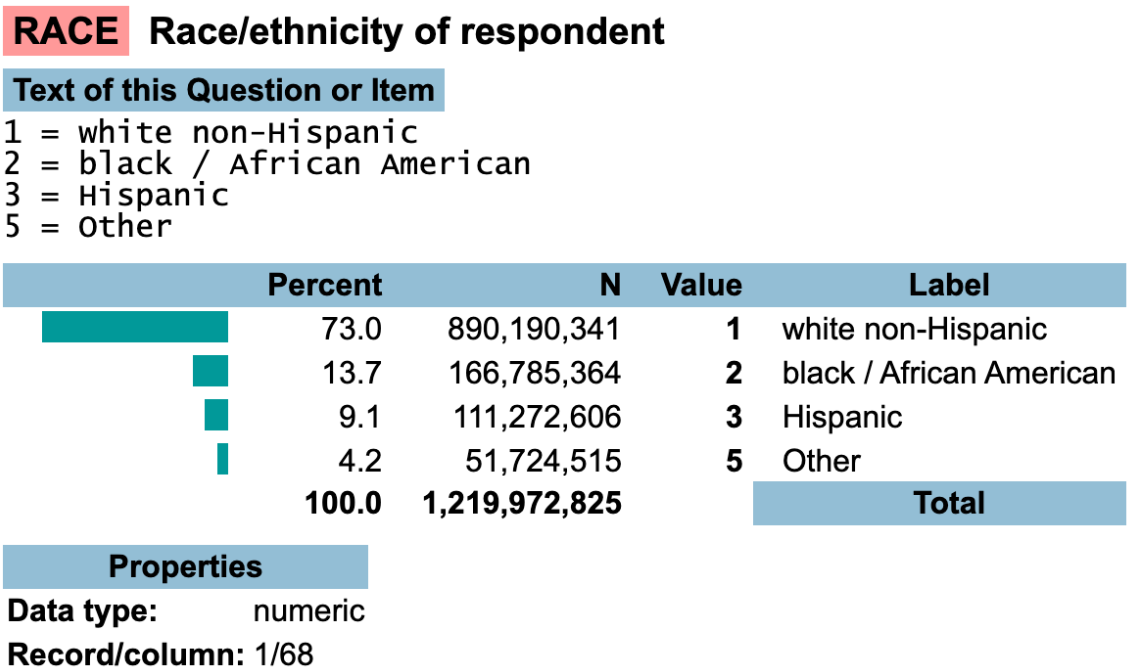

Note that there's no `4` category here. If a value for 4 *did* exist, it would be reasonable to assign it to "Asian American / Pacific Islander" — a group that doesn't seem to be represented in the dataset. This is a strange omission, but you'll often find that large public datasets have these sorts of  issues. The important thing is to always read the data dictionary carefully. In this case, remember that this dataset doesn't provide a complete picture of race in America.

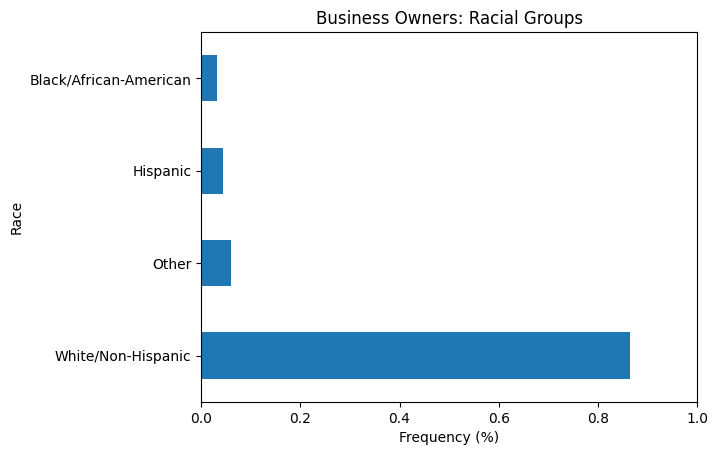

In [9]:
# Create a horizontal bar chart showing the normalized value counts for "RACE". In this chart, we replace the numerical values with the true group names

race_dict = {
    1: "White/Non-Hispanic",
    2: "Black/African-American",
    3: "Hispanic",
    5: "Other",
}
race = df_business["RACE"].replace(race_dict)
race_value_counts = race.value_counts(normalize=True)
# Create bar chart of race_value_counts
race_value_counts.plot(kind="barh")
plt.xlim((0, 1))
plt.xlabel("Frequency (%)")
plt.ylabel("Race")
plt.title("Business Owners: Racial Groups");

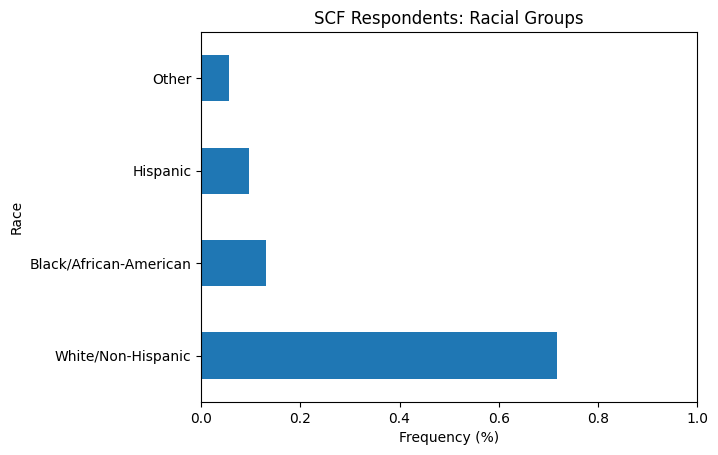

In [10]:
# Recreate the horizontal bar chart with the entire dataset df
race = df["RACE"].replace(race_dict)
race_value_counts = race.value_counts(normalize=True)
# Create bar chart of race_value_counts
race_value_counts.plot(kind="barh")
plt.xlim((0, 1))
plt.xlabel("Frequency (%)")
plt.ylabel("Race")
plt.title("SCF Respondents: Racial Groups");

### **1.2.3. Income**

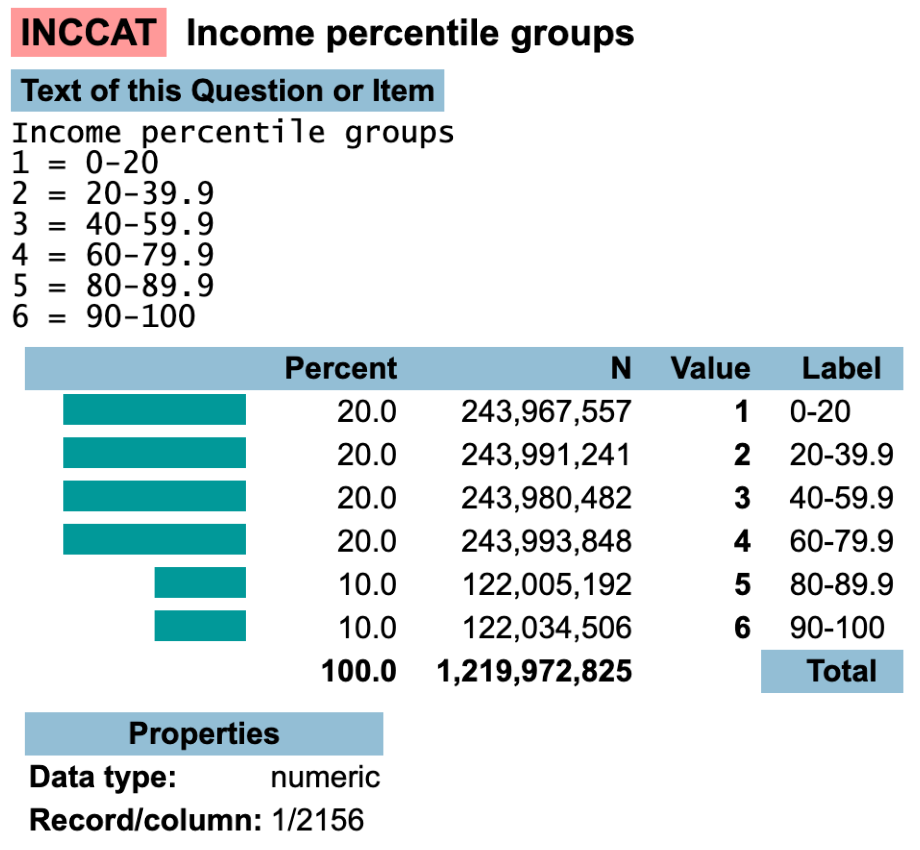

In [11]:
# Create a DataFrame df_inccat that shows the normalized frequency for income categories for business owners and non-business owners

inccat_dict = {
    1: "0-20",
    2: "21-39.9",
    3: "40-59.9",
    4: "60-79.9",
    5: "80-89.9",
    6: "90-100",
}

df_inccat = ( df["INCCAT"]
             .replace(inccat_dict)
             .groupby(df["HBUS"])
             .value_counts(normalize=True)
             .rename("frequency")
             .to_frame()
             .reset_index()
            )
df_inccat.head()

,HBUS,INCCAT,frequency
0,0,0-20,0.210348
1,0,21-39.9,0.198140
2,0,40-59.9,0.189080
3,0,60-79.9,0.186600
4,0,90-100,0.117167


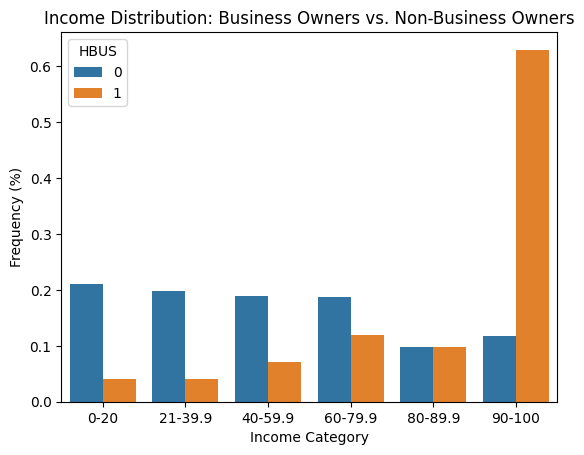

In [12]:
# Create bar chart of `df_inccat`
sns.barplot(data=df_inccat, x = "INCCAT", y = "frequency", hue = "HBUS", order=inccat_dict.values())
plt.xlabel("Income Category")
plt.ylabel("Frequency (%)")
plt.title("Income Distribution: Business Owners vs. Non-Business Owners");

### **1.2.4. Assets**

In [13]:
# Calculate the correlation coefficient for "ASSET" and "HOUSES" in the whole dataset df

asset_house_corr = df["ASSET"].corr(df["HOUSES"])
print("SCF: Asset Houses Correlation:", asset_house_corr)

SCF: Asset Houses Correlation: 0.5198273544779252


In [14]:
# Calculate the correlation coefficient for "ASSET" and "HOUSES" in the whole business owners subset df_business
asset_house_corr = df_business["ASSET"].corr(df_business["HOUSES"])
print("Business Owners: Asset Houses Correlation:", asset_house_corr)

Business Owners: Asset Houses Correlation: 0.484143472541396


In [15]:
# Make a correlation matrix using df, considering only the columns "ASSET", "HOUSES", "INCOME", "DEBT", and "EDUC"
cols = ["ASSET", "HOUSES", "INCOME", "DEBT", "EDUC"]
corr = df[cols].corr()
corr.style.background_gradient(axis=None)

,ASSET,HOUSES,INCOME,DEBT,EDUC
ASSET,1.000000,0.519827,0.622429,0.261250,0.116673
HOUSES,0.519827,1.000000,0.247852,0.266661,0.169300
INCOME,0.622429,0.247852,1.000000,0.114646,0.069400
DEBT,0.261250,0.266661,0.114646,1.000000,0.054179
EDUC,0.116673,0.169300,0.069400,0.054179,1.000000


In [16]:
# Make a correlation matrix using df_business
corr = df_business[cols].corr()
corr.style.background_gradient(axis=None)

,ASSET,HOUSES,INCOME,DEBT,EDUC
ASSET,1.000000,0.484143,0.615333,0.248475,0.085771
HOUSES,0.484143,1.000000,0.220899,0.248527,0.115943
INCOME,0.615333,0.220899,1.000000,0.103827,0.060133
DEBT,0.248475,0.248527,0.103827,1.000000,0.043232
EDUC,0.085771,0.115943,0.060133,0.043232,1.000000


### **1.2.5. Education**

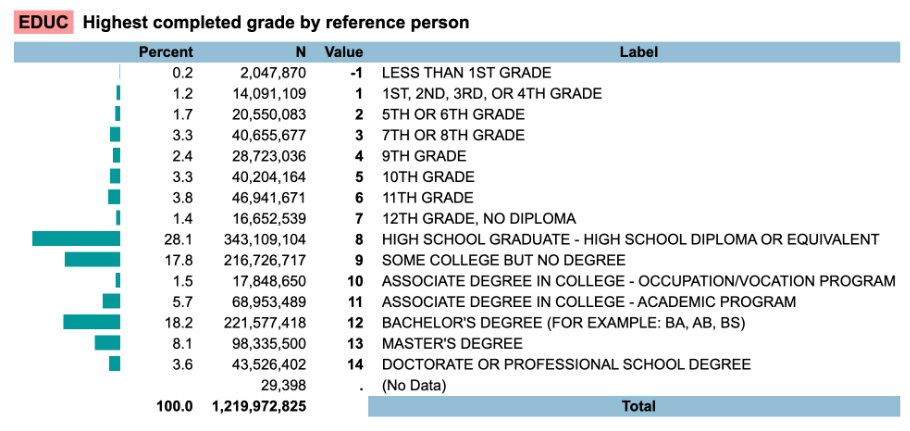

In [17]:
# Create a DataFrame df_educ that shows the normalized frequency for education categories for both the business owners and non-Business owners households in the dataset

df_educ = (
     df["EDUC"]
    .groupby(df["HBUS"])
    .value_counts(normalize=True)
    .rename("Frequency")
    .to_frame()
    .reset_index()

)
df_educ.head()

,HBUS,EDUC,Frequency
0,0,8,0.236814
1,0,12,0.214211
2,0,9,0.163138
3,0,13,0.109967
4,0,10,0.061660


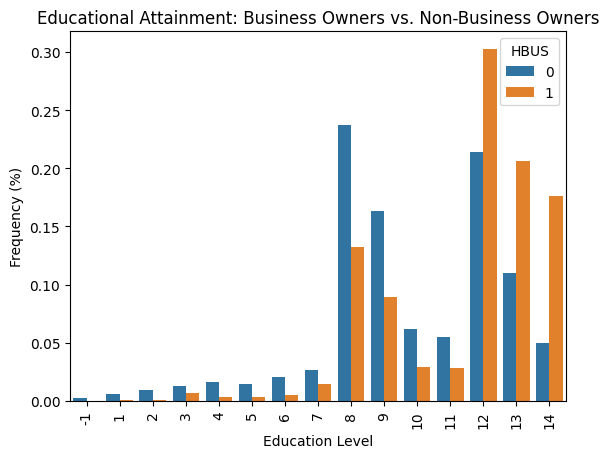

In [18]:
# Create bar chart of df_educ
sns.barplot(
    x="EDUC",
    y="Frequency",
    hue="HBUS",
    data=df_educ)

plt.xlabel("Education Level")
plt.xticks(rotation = 90)
plt.ylabel("Frequency (%)")
plt.title("Educational Attainment: Business Owners vs. Non-Business Owners");

### **1.2.6. Debt**

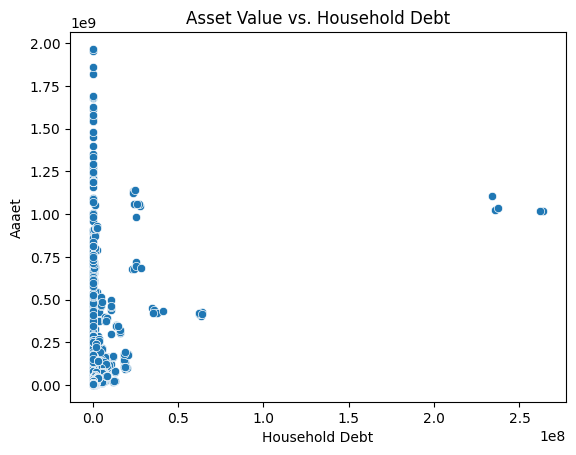

In [19]:
# Create scatter plot of ASSET vs DEBT, df
sns.scatterplot(data=df, x="DEBT" , y="ASSET")
plt.xlabel("Household Debt")
plt.ylabel("Aaaet")
plt.title("Asset Value vs. Household Debt");

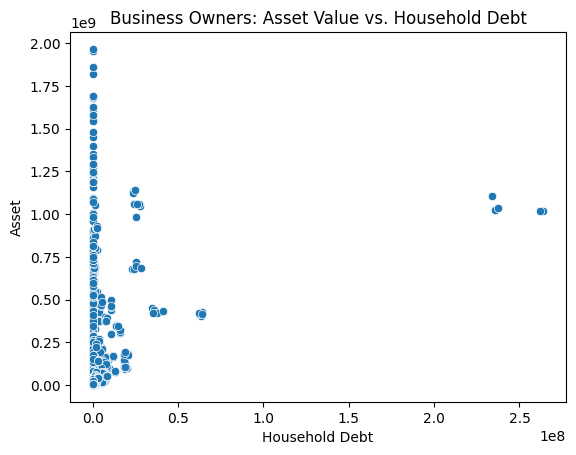

In [23]:
# Create scatter plot of ASSET vs DEBT, df_business
sns.scatterplot(data=df_business, x="DEBT" , y="ASSET")
plt.xlabel("Household Debt")
plt.ylabel("Asset")
plt.title("Business Owners: Asset Value vs. Household Debt");

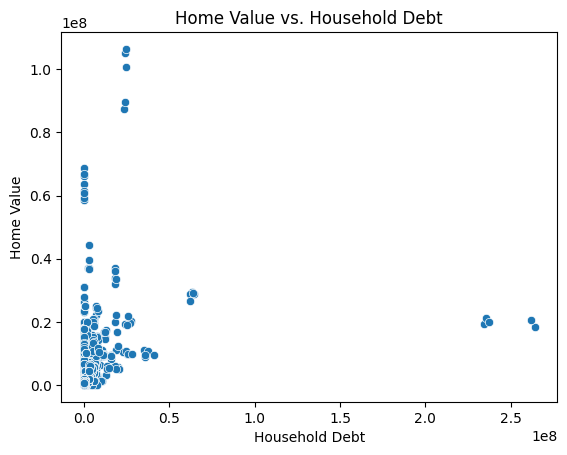

In [25]:
# Create scatter plot of HOUSES vs DEBT, df
sns.scatterplot(data=df, x="DEBT" , y="HOUSES")
plt.xlabel("Household Debt")
plt.ylabel("Home Value")
plt.title("Home Value vs. Household Debt");

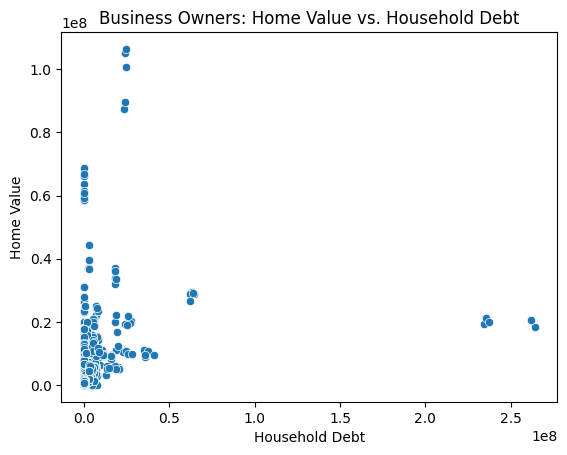

In [24]:
# Create scatter plot of HOUSES vs DEBT, df_business
sns.scatterplot(data=df_business, x="DEBT" , y="HOUSES")
plt.xlabel("Household Debt")
plt.ylabel("Home Value")
plt.title("Business Owners: Home Value vs. Household Debt");